1. Use the SHAP Machine Learning Explainability Toolkit to Perform Explainability Analysis on a Random Forest Classification Model Trained on the UCI Heart Disease Dataset.
2. Generate Feature Importance Plots, SHAP Value Plots, and SHAP Value Plots for All Features of Individual Samples.
3. This Brings Explainability to the Machine Learning Model, Breaks the Black Box, Provides a Deeper Understanding of the Model, Improves the Model, and Increases Trust in the Model.

# Build the Dataset, Train the Model, and Predict on Test Set Samples

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('process_heart.csv')

X = df.drop('target', axis=1)
y = df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_test = X_test.astype(float)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# Feature importance
For a certain feature, calculate the sum of the shap values ​​of the feature for each patient in the test set. The higher the shap value, the more important the feature is.

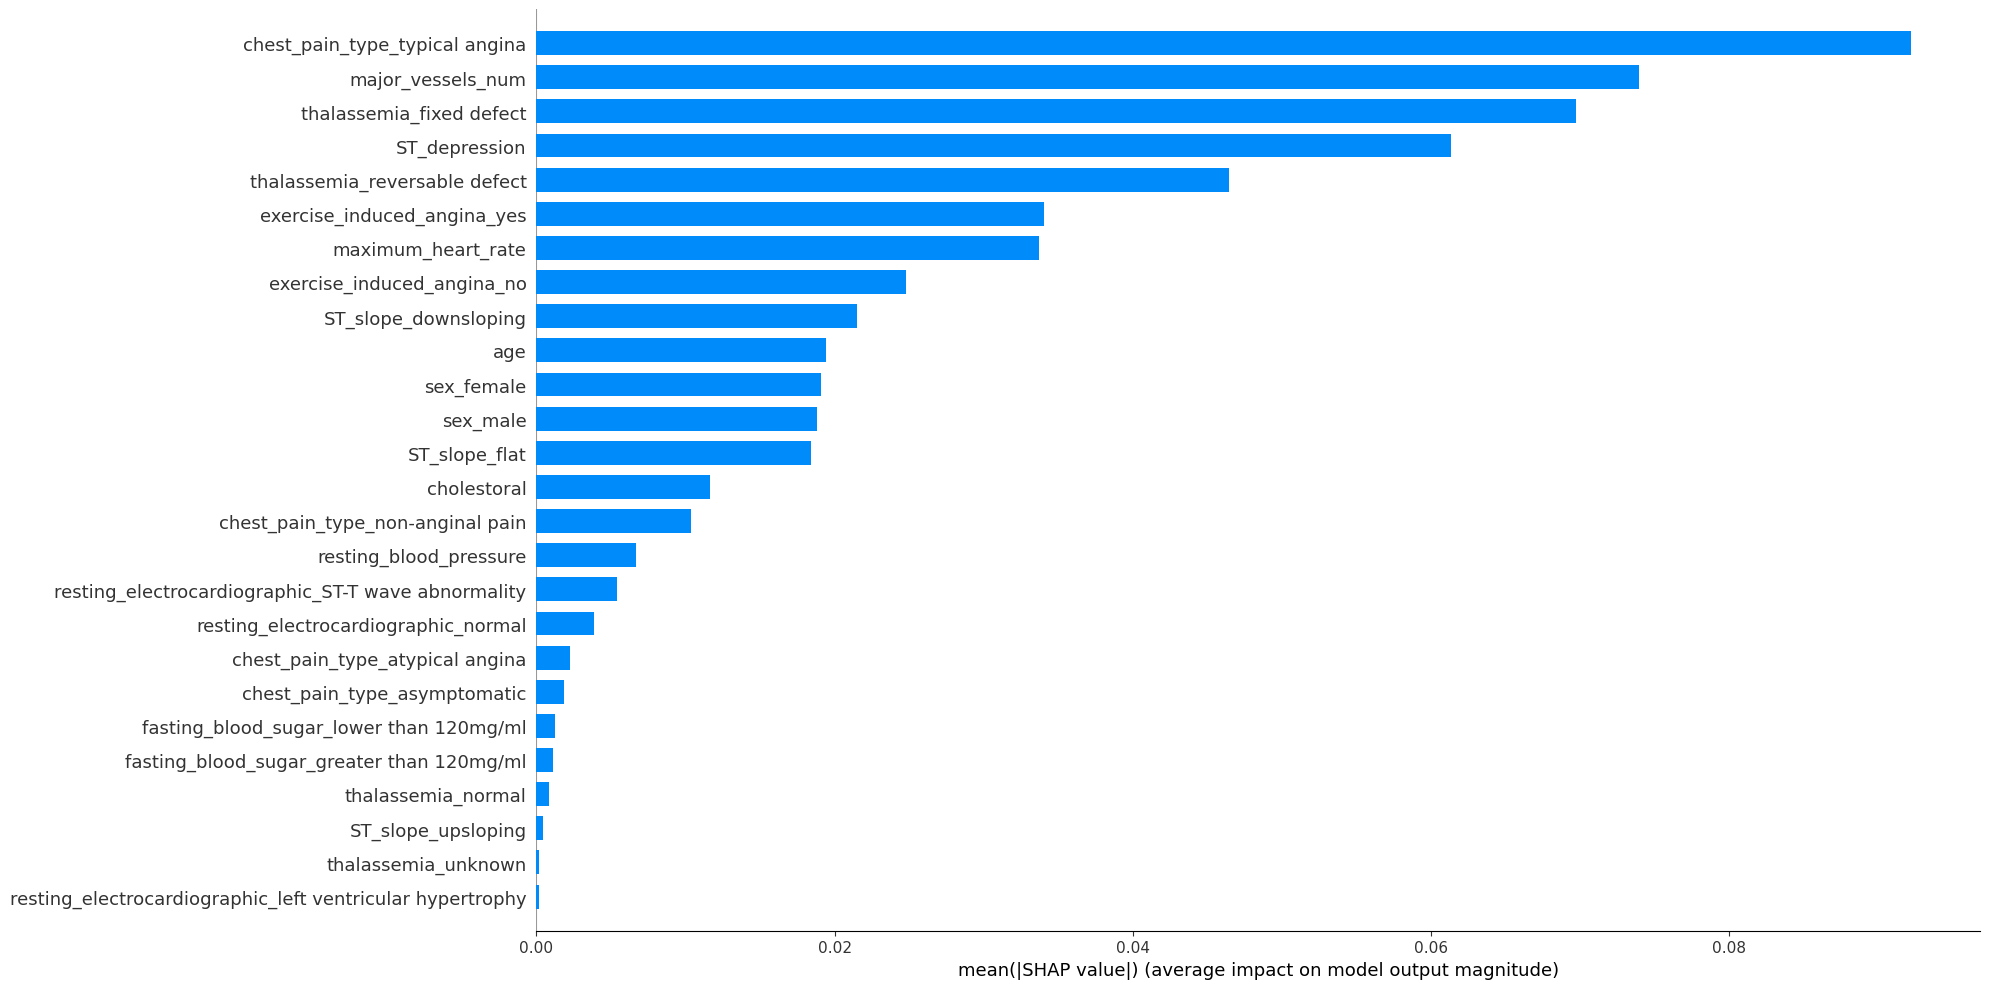

In [2]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap_values_class1 = shap_values[:, :, 1]
shap.summary_plot(shap_values_class1, X_test, plot_type="bar", max_display=26, plot_size=(20, 10))

# The relationship between the numerical size of each feature and the shap value of each feature

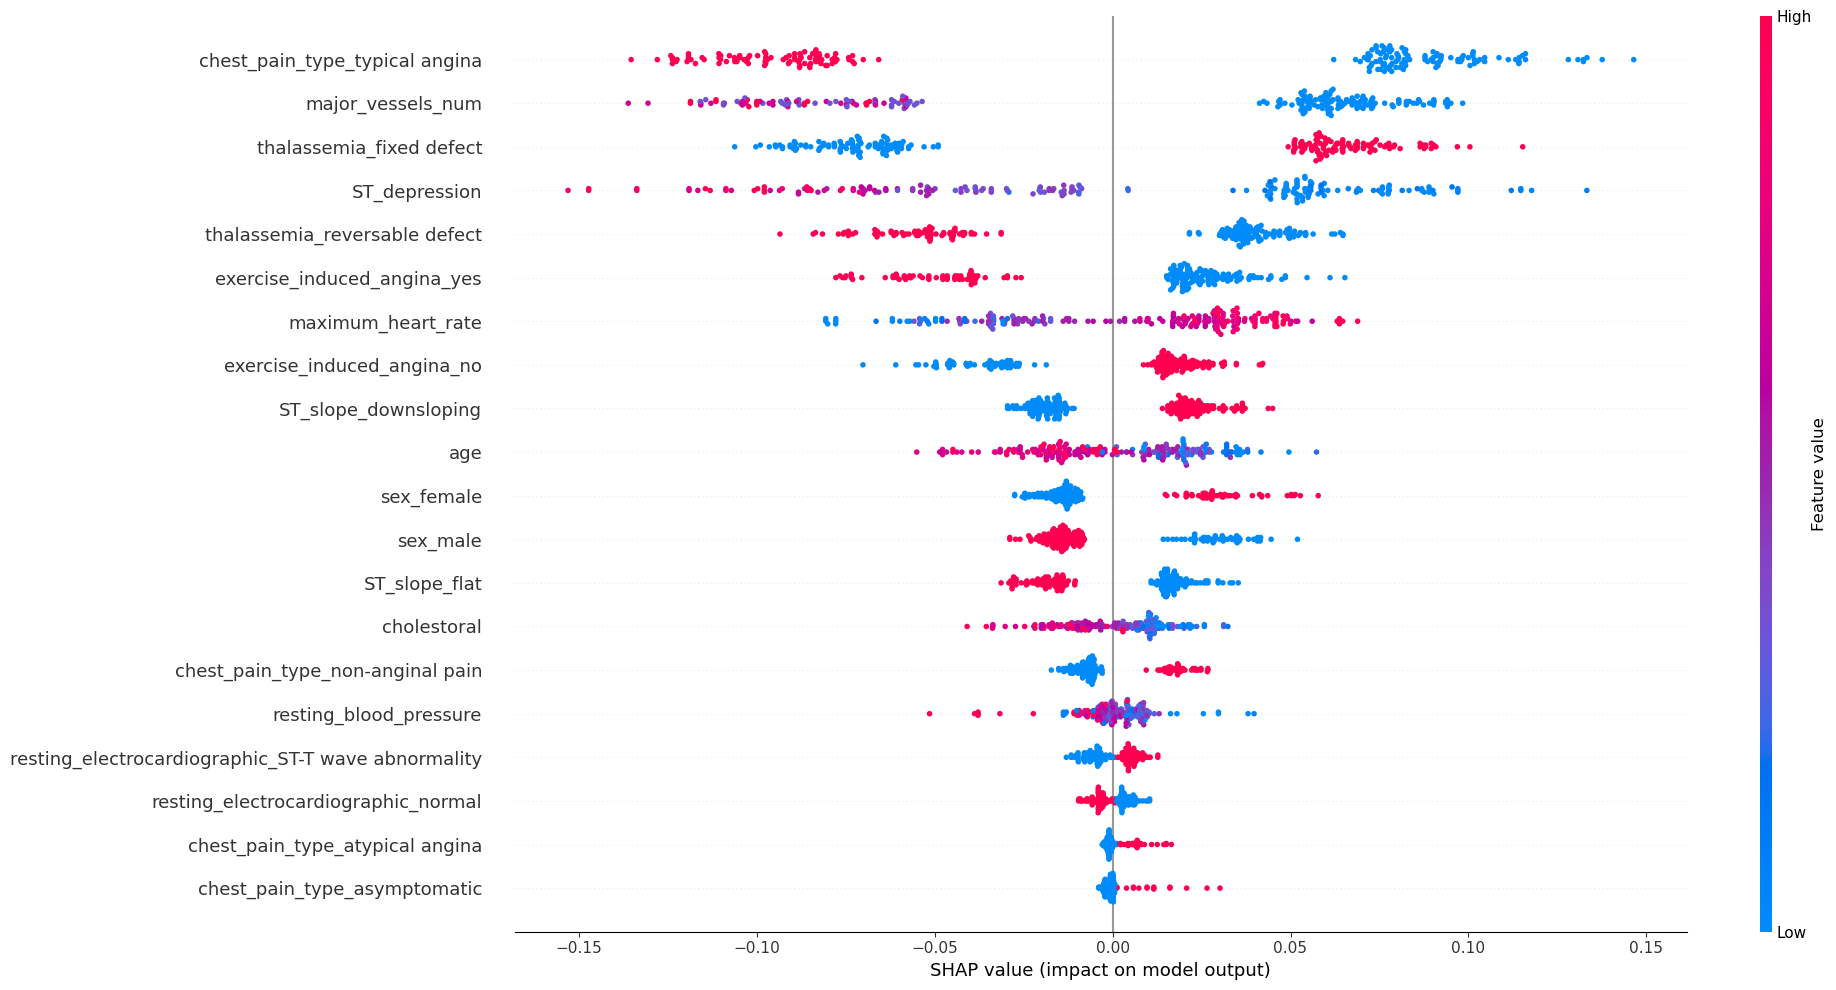

In [3]:
shap.summary_plot(shap_values_class1, X_test, plot_size=(20, 10))

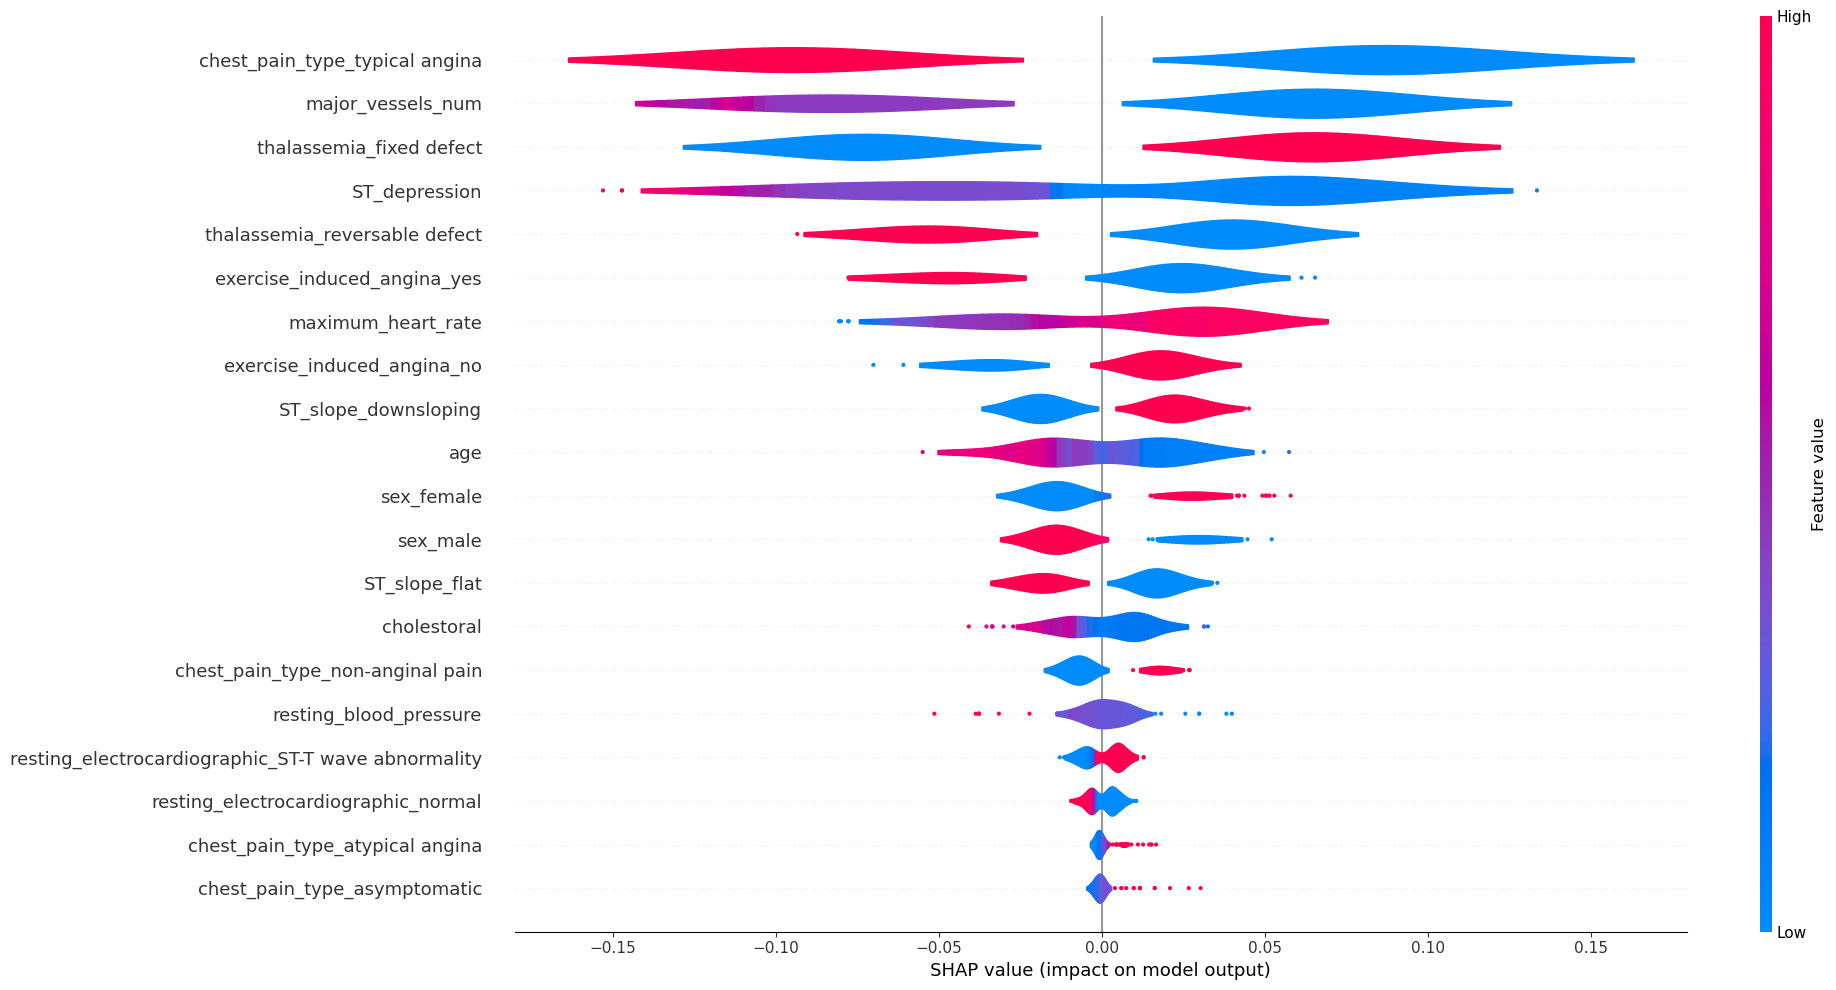

In [4]:
X_test = X_test.astype(float)
shap.summary_plot(shap_values_class1, X_test, plot_type="violin", plot_size=(20, 10))

The Larger the major_vessels_num, the Smaller Its Positive Contribution to the Prediction of "Diseased"

The Larger the maximum_heart_rate, the Greater Its Positive Contribution to the Prediction of "Diseased".

# Analyze the impact of each characteristic of a single sample on the predicted "diseased" outcome

In [5]:
X_test.head(10)

,age,resting_blood_pressure,cholestoral,maximum_heart_rate,ST_depression,major_vessels_num,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,...,resting_electrocardiographic_normal,exercise_induced_angina_no,exercise_induced_angina_yes,ST_slope_downsloping,ST_slope_flat,ST_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect,thalassemia_unknown
620,57.0,152.0,274.0,88.0,1.2,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
181,64.0,110.0,211.0,144.0,1.8,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
546,70.0,130.0,322.0,109.0,2.4,3.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
618,49.0,130.0,266.0,171.0,0.6,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
822,60.0,130.0,253.0,144.0,1.4,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
754,51.0,130.0,256.0,149.0,0.5,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1010,51.0,140.0,299.0,173.0,1.6,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
307,44.0,120.0,220.0,170.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
524,58.0,112.0,230.0,165.0,2.5,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
684,60.0,140.0,185.0,155.0,3.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [6]:
idx = 618
patient = X.iloc[idx, :]
patient

age                                                             49
resting_blood_pressure                                         130
cholestoral                                                    266
maximum_heart_rate                                             171
ST_depression                                                  0.6
major_vessels_num                                                0
sex_female                                                   False
sex_male                                                      True
chest_pain_type_asymptomatic                                 False
chest_pain_type_atypical angina                               True
chest_pain_type_non-anginal pain                             False
chest_pain_type_typical angina                               False
fasting_blood_sugar_greater than 120mg/ml                    False
fasting_blood_sugar_lower than 120mg/ml                       True
resting_electrocardiographic_ST-T wave abnormality            

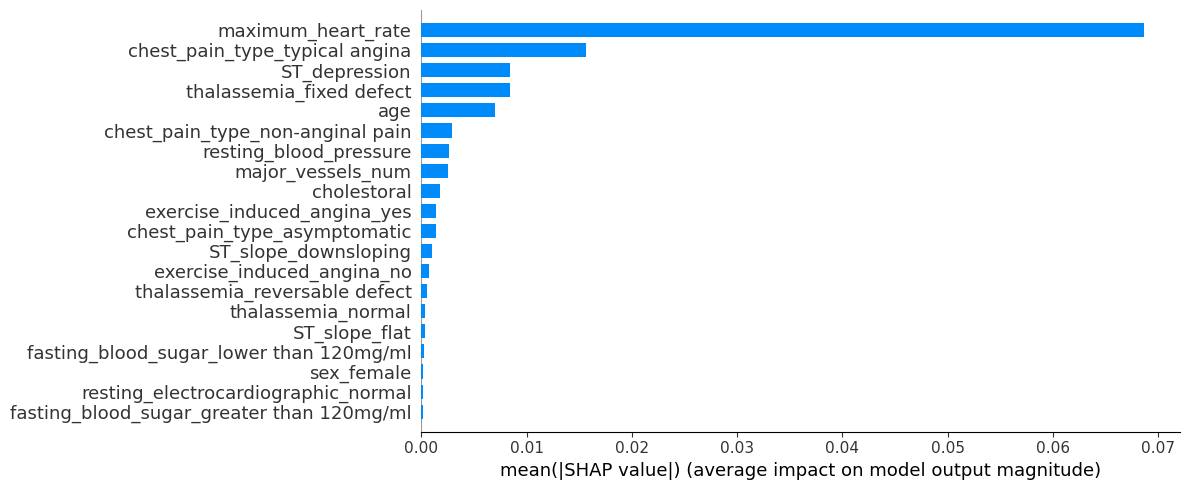

In [7]:
shap_interaction_values = explainer.shap_interaction_values(X_test)
feature_effects = np.sum(np.abs(shap_interaction_values[1][3]), axis=1)
shap.summary_plot(feature_effects.reshape(1,-1), X_test, plot_type="bar", plot_size=(12, 5))

In [8]:
shap_values_patient = explainer.shap_values(patient)
shap_values_patient

array([[-2.71341982e-02,  2.71341982e-02],
       [-8.66500387e-03,  8.66500387e-03],
       [ 6.35482932e-03, -6.35482932e-03],
       [-4.22008463e-02,  4.22008463e-02],
       [-4.42224508e-02,  4.42224508e-02],
       [-6.06240397e-02,  6.06240397e-02],
       [ 1.45209402e-02, -1.45209402e-02],
       [ 1.34646509e-02, -1.34646509e-02],
       [ 6.97653614e-05, -6.97653614e-05],
       [-7.15342093e-03,  7.15342093e-03],
       [ 5.24146437e-03, -5.24146437e-03],
       [-7.60197040e-02,  7.60197040e-02],
       [ 3.41552572e-04, -3.41552572e-04],
       [ 6.80622662e-04, -6.80622662e-04],
       [-6.11107473e-03,  6.11107473e-03],
       [-1.60098814e-04,  1.60098814e-04],
       [-2.27978140e-03,  2.27978140e-03],
       [-1.61536770e-02,  1.61536770e-02],
       [-2.05733066e-02,  2.05733066e-02],
       [-2.22187228e-02,  2.22187228e-02],
       [-1.71170232e-02,  1.71170232e-02],
       [ 2.41968098e-04, -2.41968098e-04],
       [-7.04904487e-02,  7.04904487e-02],
       [-7.

In [9]:
shap_values_patient.T[0]

array([-2.71341982e-02, -8.66500387e-03,  6.35482932e-03, -4.22008463e-02,
       -4.42224508e-02, -6.06240397e-02,  1.45209402e-02,  1.34646509e-02,
        6.97653614e-05, -7.15342093e-03,  5.24146437e-03, -7.60197040e-02,
        3.41552572e-04,  6.80622662e-04, -6.11107473e-03, -1.60098814e-04,
       -2.27978140e-03, -1.61536770e-02, -2.05733066e-02, -2.22187228e-02,
       -1.71170232e-02,  2.41968098e-04, -7.04904487e-02, -7.59730451e-04,
       -3.68246190e-02, -1.99429878e-04])

In [10]:
shap_values_patient.T[1]

array([ 2.71341982e-02,  8.66500387e-03, -6.35482932e-03,  4.22008463e-02,
        4.42224508e-02,  6.06240397e-02, -1.45209402e-02, -1.34646509e-02,
       -6.97653614e-05,  7.15342093e-03, -5.24146437e-03,  7.60197040e-02,
       -3.41552572e-04, -6.80622662e-04,  6.11107473e-03,  1.60098814e-04,
        2.27978140e-03,  1.61536770e-02,  2.05733066e-02,  2.22187228e-02,
        1.71170232e-02, -2.41968098e-04,  7.04904487e-02,  7.59730451e-04,
        3.68246190e-02,  1.99429878e-04])

In [11]:
shap_values_patient.T[0] + shap_values_patient.T[1]

array([ 1.04083409e-17, -1.04083409e-17, -8.67361738e-19, -5.55111512e-17,
       -4.85722573e-17, -4.85722573e-17,  1.38777878e-17,  6.93889390e-18,
        0.00000000e+00, -3.46944695e-18,  3.46944695e-18,  1.66533454e-16,
       -6.50521303e-19,  1.08420217e-19,  8.67361738e-19,  5.42101086e-20,
       -1.73472348e-18,  1.04083409e-17,  6.93889390e-18, -1.04083409e-17,
        6.93889390e-18,  1.35525272e-19, -6.93889390e-17,  0.00000000e+00,
       -6.24500451e-17,  1.62630326e-19])

In [12]:
shap.force_plot(explainer.expected_value[1], shap_values_patient.T[1], patient)

The Force Plot Shows the Contribution of Each Feature to the Prediction of "Diseased" for Patient 618. Red Indicates Positive Contribution, Blue Indicates Negative Contribution, and the Longer the Bar, the Higher the SHAP Value, Indicating Greater Impact.

The True Target for Patient 618 is True, and the Model Predicted 0.93

In [13]:
idx = 175
patient = X.iloc[idx, :]
shap_values_patient = explainer.shap_values(patient)
shap.force_plot(explainer.expected_value[1], shap_values_patient.T[1], patient)

The True Target for Patient 175 is Fales, and the Model Predicted 0.02

# Summary plot of all samples in the test set

In [14]:
number_show = 205

# Ensure you're accessing rows correctly with .iloc
X_train_subset = X_train.iloc[:number_show]
X_test_subset = X_test.iloc[:number_show]

# Generate SHAP values and force plot
shap_values_summary = explainer.shap_values(X_train_subset)
shap.force_plot(explainer.expected_value[1], shap_values_summary.T[1], X_test_subset)

# Dependence Plot

Show How the SHAP Value of a Specific Feature Changes as Its Value Increases for the Prediction Result

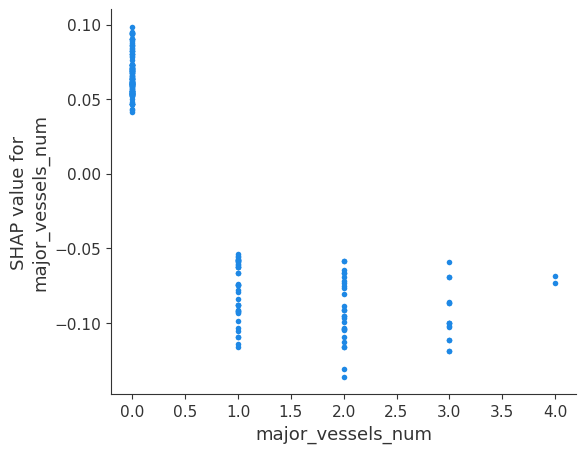

In [15]:
shap.dependence_plot("major_vessels_num", shap_values_class1, X_test, interaction_index=None)

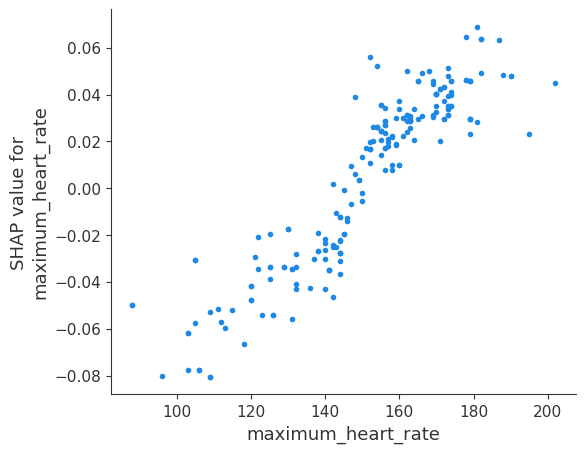

In [16]:
shap.dependence_plot("maximum_heart_rate", shap_values_class1, X_test, interaction_index=None)

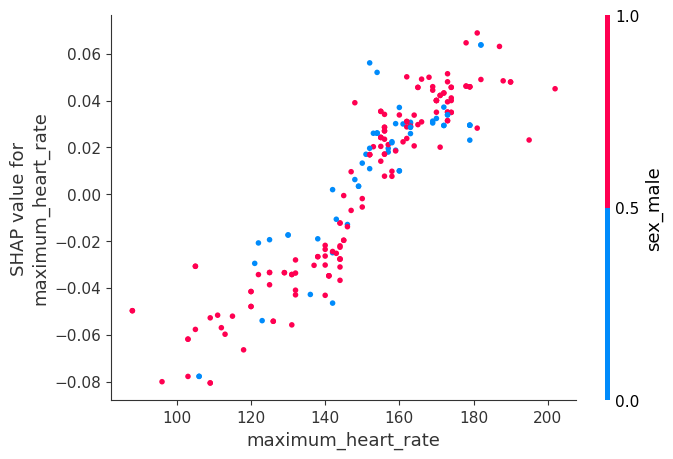

In [17]:
shap.dependence_plot("maximum_heart_rate", shap_values_class1, X_test, interaction_index="sex_male")

# Partial Dependence Plot(PDP)

Show How the Model's Prediction Result Changes as a Specific Feature Increases

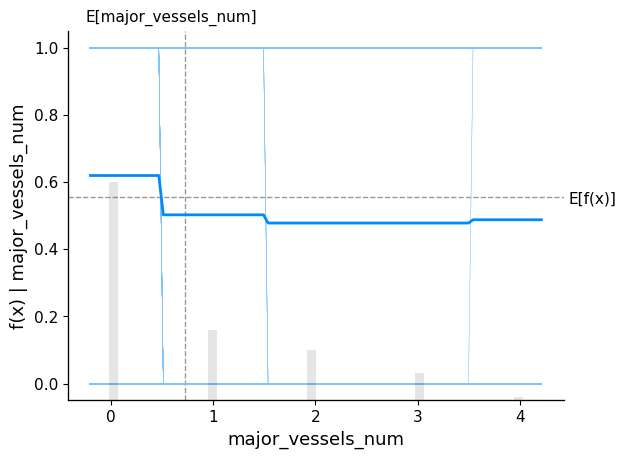

In [18]:
shap.partial_dependence_plot("major_vessels_num", model.predict, X_test, model_expected_value=True, feature_expected_value=True)

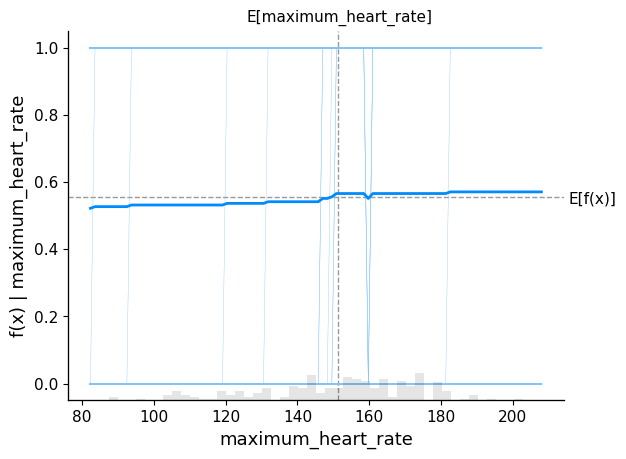

In [19]:
shap.partial_dependence_plot("maximum_heart_rate", model.predict, X_test, model_expected_value=True, feature_expected_value=True)

# Decision Plot

Show the Decision Process for All Data in the Test Set

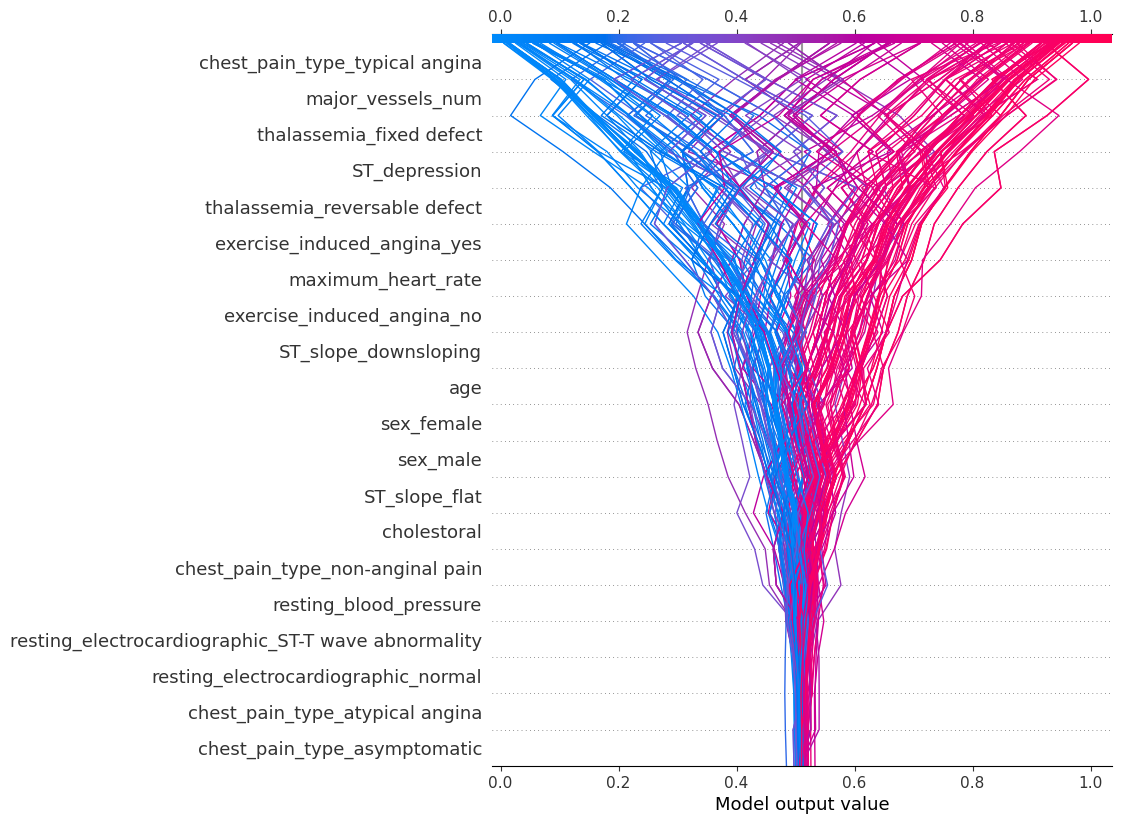

In [20]:
shap.decision_plot(explainer.expected_value[1], shap_values_class1, X_test)

# View Typical Decision Paths and Outliers

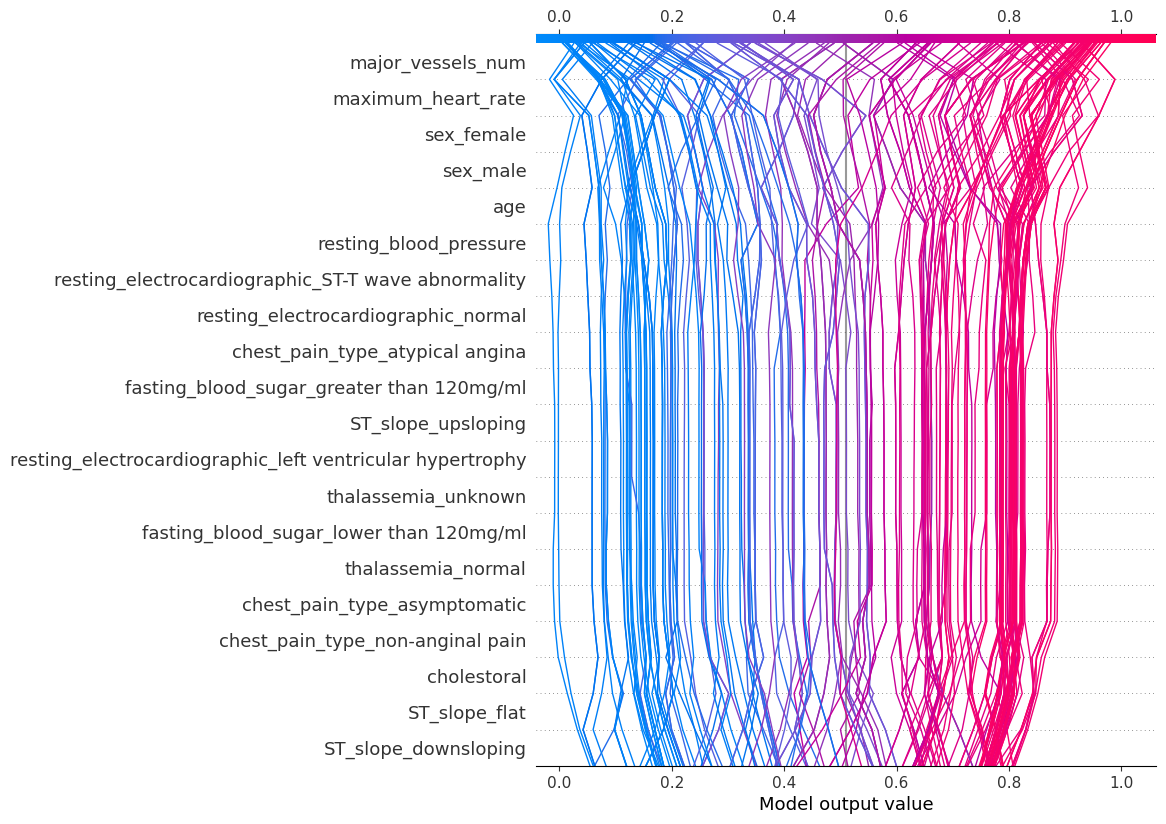

In [21]:
shap.decision_plot(explainer.expected_value[1], shap_values_class1, X_test, feature_order='hclust')

# Draw a decision diagram for a single sample

The Sample with Index 24 Corresponds to Index 16 in the Original Dataset X


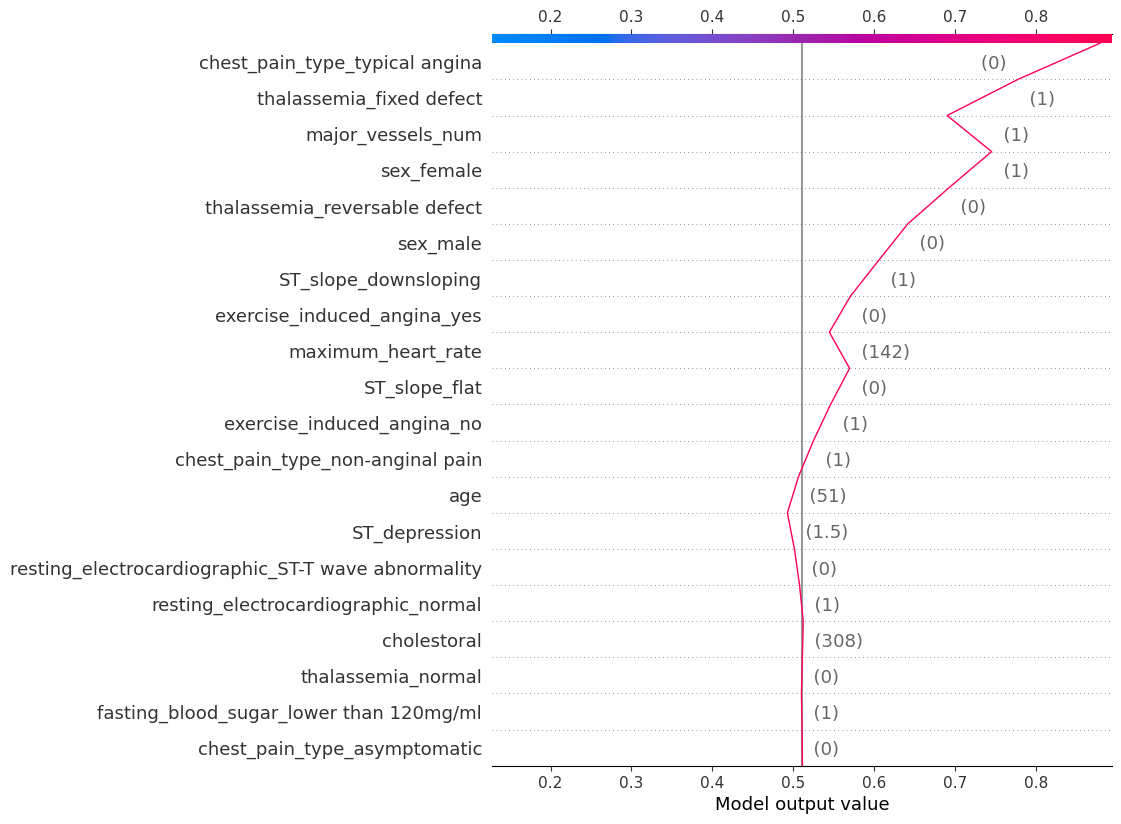

In [22]:
idx = 24
selection = np.zeros((205))
selection[idx] = 1
selection = selection > 0
print('The Sample with Index {} Corresponds to Index {} in the Original Dataset X'.format(idx, X_test.iloc[idx:idx+1].index[0]))
shap.decision_plot(explainer.expected_value[1], shap_values_class1[selection], X_test[selection])

# Select the Misclassified Samples in the Test Set

In [23]:
misclassified = y_pred != y_test
misclassified_df = pd.DataFrame({'Is the prediction wrong?':misclassified})
misclassified_df

,Is the prediction wrong?
620,False
181,False
546,False
618,False
822,False
...,...
765,False
176,False
1024,False
444,False


In [24]:
misclassified_df = misclassified_df[misclassified_df['Is the prediction wrong?'] == True]
misclassified_df

,Is the prediction wrong?
684,True
629,True
646,True
962,True
811,True
274,True
353,True
638,True
27,True
987,True


In [25]:
misclassified_df.shape

(20, 1)

In [26]:
idx = 684
patient = X.iloc[idx, :]
shap_values_patient = explainer.shap_values(patient)
shap.force_plot(explainer.expected_value[1], shap_values_patient.T[1], patient)

The True Target for Patient 684 is Fales, and the Model Predicted 0.51

In [27]:
idx = 398
patient = X.iloc[idx, :]
shap_values_patient = explainer.shap_values(patient)
shap.force_plot(explainer.expected_value[1], shap_values_patient.T[1], patient)

The True Target for Patient 398 is Ture, and the Model Predicted 0.49

# Display the Misclassified Samples in the Test Set on the Decision Plot

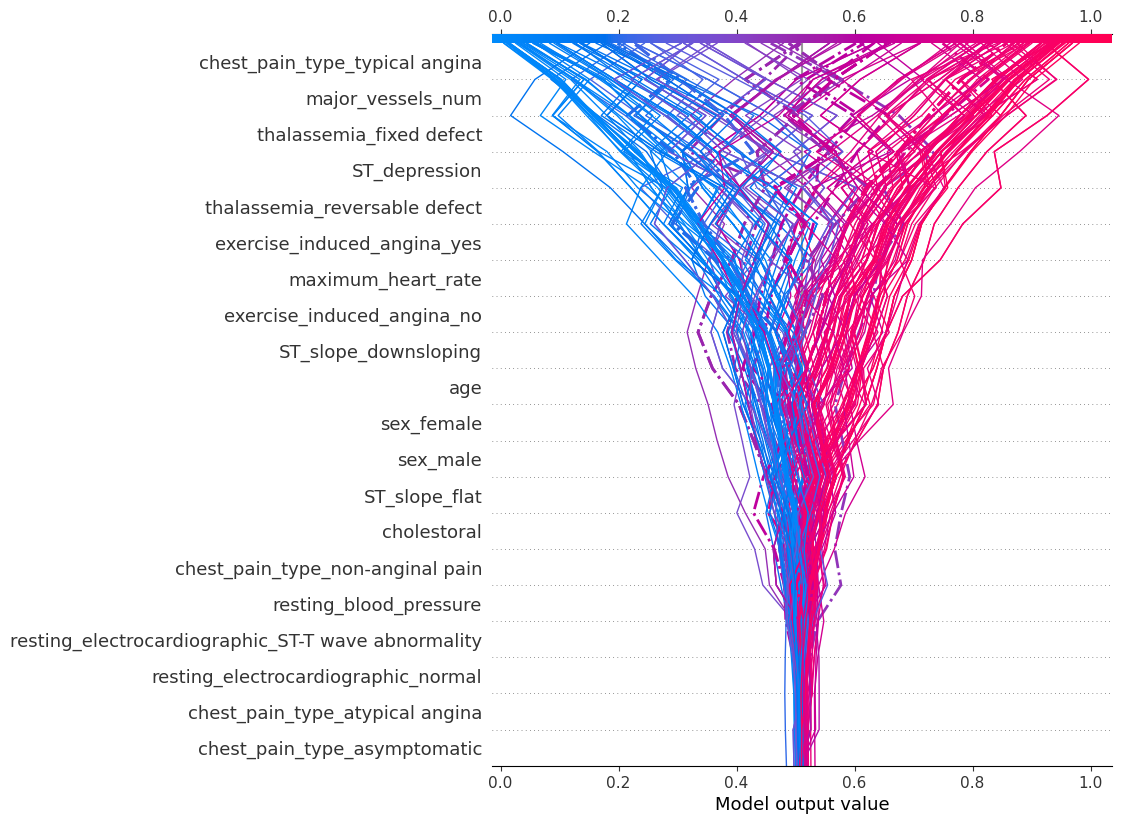

In [28]:
shap.decision_plot(explainer.expected_value[1], shap_values_class1, X_test, highlight=misclassified)

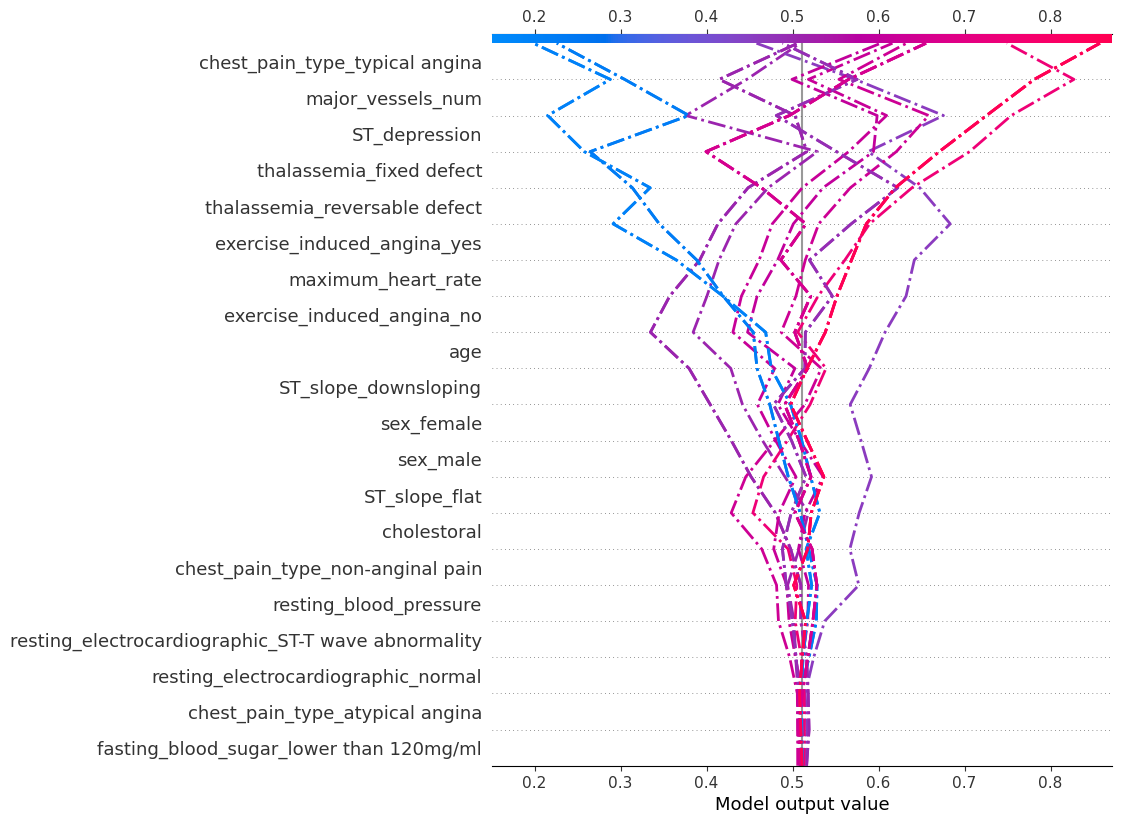

In [29]:
shap.decision_plot(explainer.expected_value[1], shap_values_class1[misclassified], X_test[misclassified], highlight=range(len(misclassified_df)))